<h1><center>Introduction to Probabilistic Graphical Models : Lab 1</center></h1>
<h2><center>Aymen DABGHI</center></h2>

In [17]:
#importing packages for the lab

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from IPython.display import Image
from networkx.drawing.nx_agraph import to_agraph

## Question 0 :

We saw in the course that :  

$\begin{align}
\log [\sum \limits_{i=1}^n \exp(v_i)] &= \log [\sum \limits_{i=1}^n \exp(v_i-v_{max}+v_{max})] \\
&= v_{max} + \log[\sum \limits_{i=1}^n \exp(v_i-v_{max})]
\quad\quad \text{with $v_{max}=max_i (v_i)$}
\end{align}$



In [18]:
def compute_s(v):
    v_max = np.max(v)
    return v_max + np.log(sum(np.exp(v - v_max)))

In [19]:
v = [-1234 , -1235]
compute_s(v)

-1233.6867383124818

## Question 1 :


Note : We suppose, as the exercise says, that the robot, when moving, goes to the next point in counter-clock direction and therefore the next step would be indexed as the previous one +1 !

### 1) 
We note the following random variables :  

$X =$ The true position of the robot  
$X \in \{1,\cdots ,N\}$    
$\left\{
\begin{array}{ll}
p(x_0=i)=\frac{1}{N} \quad\quad \forall i \in \{1,\cdots ,N\}   \\
p(x_k=i/x_{k-1}=i)=\epsilon  \\
p(x_k=i/x_{k-1}=i-1)=1-\epsilon  
\end{array}
\right.$

$Y =$ The position observed  
$Y \in \{1,\cdots ,N\}$    
$\left\{
\begin{array}{ll}
p(y_k=x_{k})=\omega + \frac{1-\omega}{N} \\
p(y_k \ne x_{k})=\frac{1-\omega}{N}  
\end{array}
\right.$

As for the generative model of HMM, we know from the course that : 

$ X_{k} / X_{k-1} \sim p( X_{k} / X_{k-1}) \\
 y_{k} / X_{k} \sim p( y_{k} / X_{k}) $


In [20]:
# Generating the adjacency matrix of X in order to draw the associated directed graphical model

N = 10
eps = 0.1
A = eps * np.identity(N)
for i in range(N):
    A[i,i-1] = 1 - eps
A[0,N-1] = 1 - eps

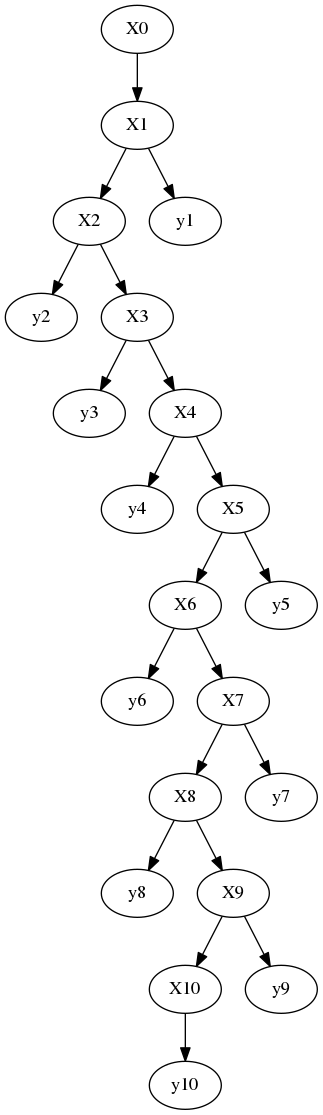

In [21]:
edges= [ (i, i+1) for i in range(N)] + [(i+1, i+1+N) for i in range (N)]
labels={i: 'X'+str(i) for i in range (N+1)}
labels1={i+N+1: 'y'+str(i+1) for i in range (N)}
labels2 = dict(list(labels.items()) + list(labels1.items())) 
G = nx.MultiDiGraph(edges)
G=nx.relabel_nodes(G, labels2)
M = to_agraph(G) 
M.layout('dot')                                                                 
M.draw("State_transiton1.png")
from IPython.display import Image
Image("State_transiton1.png")

### 2)
If we consider that $\epsilon$ is the probability that the robot stays where it is, $1-\epsilon$ is the probability that the robot moves, $\omega$ the probability that the sensor gives the true position of the robot and $1-\omega$ the probability that it fails, then :

The transition matrix is :  
$$A=
\begin{vmatrix}
\epsilon & 0 & \cdots & 0 & 1-\epsilon\\
1-\epsilon & \ddots & \ddots & \vdots & 0\\
0 & \ddots & \ddots & 0 & \vdots\\
\vdots & \ddots & \ddots & \ddots & 0\\
0 & \cdots & 0 & 1-\epsilon & \epsilon \\
\end{vmatrix}
$$

The observation matrix is :  
$$C=
\begin{vmatrix}
\omega + \frac{1-\omega}{N} & \frac{1-\omega}{N} & \cdots & \cdots & \frac{1-\omega}{N} \\
\frac{1-\omega}{N} & \ddots & \ddots &  & \vdots\\
\vdots & \ddots & \ddots & \ddots & \vdots\\
\vdots &  & \ddots & \ddots & \frac{1-\omega}{N}\\
\frac{1-\omega}{N} & \cdots & \cdots & \frac{1-\omega}{N} & \omega + \frac{1-\omega}{N} \\
\end{vmatrix}
$$

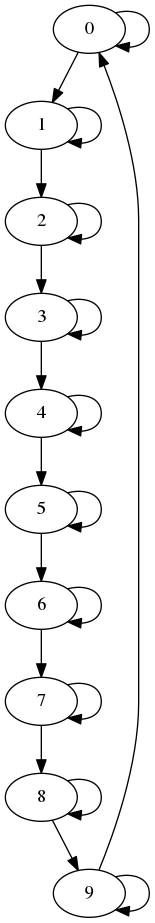

In [22]:
# Transition graph : 

eps = 0.3   #Probability of not-moving

G = nx.MultiDiGraph()
G.add_nodes_from(range(0,N))
for i in range(N): 
    for j in range(N): 
        if A[i,j] !=0: 
            G.add_weighted_edges_from([(j,i,A[i,j])])

M = to_agraph(G) 
M.layout('dot')  
M.draw("g.png")
Image("g.png")

### 3)
#### a) $p(x_k/y_{1:k})$
#### b) $p(x_k/y_{1:K})$
#### c) $p(x_{k+1}/y_{1:k})$
#### d) $p(y_{k+1}/y_{1:k})$
#### e) $p(x_0/y_{1:k})$
#### f) $\arg\max_{x_k}p(x_k/y_{1:k})$
#### g) $\arg\max_{x_k}p(x_{0:k}/y_{1:k})$

### 4)

In [23]:
N = 50   #Number of states

#Trasition model
ep = 0.3   #Probability of not-moving
A = ep * np.identity(N)   #Transition matrix
for i in range(N):
    A[i,i-1] = 1 - ep
A[0,N-1] = 1 - ep

#Observation model
w = 0.8   #Probability of observing true state
C = w * np.identity(N) + ((1-w)/N) * np.ones(N)   #Pbservation matrix

#Prior
pri = [1./N] * N

In [24]:
def hmm(K,A):
    state = np.zeros(K)
    obs = np.zeros(K)
    for k in range(K):
        if k == 0 :
            state[k] = np.random.choice(np.arange(0,N), p = pri)
        else:
            state[k] = np.random.choice(np.arange(0,N) , p = A[:,int(state[k-1])])
        obs[k] = np.random.choice(np.arange(0,N) , p = C[:,int(state[k])])
    return state , obs

In [28]:
state , obs = hmm(100,A)

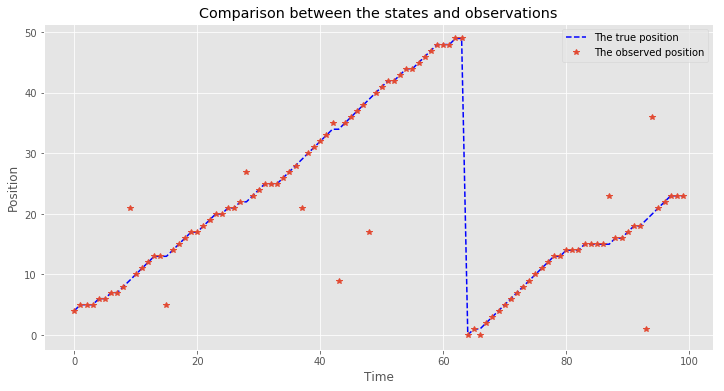

In [29]:
plt.figure(figsize=(12,6))
plt.plot(state , 'b--' , label='The true position')
plt.plot(obs , '*' , label='The observed position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Comparison between the states and observations')
plt.legend()
plt.show()

We can easily see that the sensor succeeds to find the true position of the robot in more than 75% of the time, and if not, it gives a random position that is independent from the true position.

In [39]:
c = 0
for i in range(len(state)):
    if state[i] == obs[i]:
        c+=1
print("The % of the sensor being right is : " + str(c) + "%")

The % of the sensor being right is : 89%


### 5)

In [40]:
def state_predict(A , log_p):
    mx = max(log_p[:])   #Stable computation
    p = np.exp(log_p - mx)
    return np.log(np.dot(A,p)) + mx

In [41]:
def state_update(obs , log_p):
    return np.log(obs[:]) + log_p

In [42]:
def state_postdict(A , log_p):
    mx = max(log_p[:])   #Stable computation
    p = np.exp(log_p - mx)
    return np.dot(A.T,p) + mx

In [43]:
def f_pass(K,A):
    log_alpha = np.zeros((N,K))
    log_alpha_predict = np.zeros((N,K))
    for k in range(K):
        if k == 0:
            log_alpha_predict[:,k] = np.log(pri)
        else:
            log_alpha_predict[:,k] = state_predict(A , log_alpha[:,k-1])
        log_alpha[:,k] = state_update(C[int(obs[k]),:] , log_alpha_predict[:,k])
    return log_alpha , log_alpha_predict

In [44]:
def b_pass(T,A):
    log_beta = np.zeros((N,T))
    log_beta_postdict = np.zeros((N,T))
    for t in range(T-1,-1,-1):
        if t == T-1:
            log_beta_postdict[:,t] = np.zeros(N)
        else:
            log_beta_postdict[:,t] = state_postdict(A,log_beta[:,t+1])
        log_beta[:,t] = state_update(C[int(obs[t]),:] , log_beta_postdict[:,t])
    return log_beta , log_beta_postdict

In [45]:
K = 100
T = 100
log_alpha , log_alpha_predict = f_pass(K,A)
log_beta , log_beta_postdict = b_pass(T,A)

In [46]:
#Smoothing
log_gamma = log_alpha + log_beta_postdict

The distribution of the robot’s current position given the observations so far :

$p(x_k/y_{1:k})=\frac{p(x_k,y_{1:k})}{\sum\nolimits_{X_k}p(x_k,y_{1:k})}=\frac{\alpha_{k/k}}{\sum\nolimits_{X_k}\alpha_{k/k}}$  

In [47]:
#Computing the quantity defined in 3)a)
def q3a(k,log_alpha):
    alpha = np.exp(log_alpha)
    return alpha[:,k-1]/np.sum(alpha[:,k-1])

The distribution of the robot’s position at time step k given all the observations :

$p(x_k/y_{1:K})=\frac{p(x_k,y_{1:K})}{\sum\nolimits_{X_k}p(x_k,y_{1:K})}=\frac{\gamma_{k/k}}{\sum\nolimits_{X_k}\gamma_{k/k}}$  

In [48]:
#Computing the quantity defined in 3)b)
def q3b(k,log_gamma):
    gamma = np.exp(log_gamma)
    return gamma[:,k-1]/np.sum(gamma[:,k-1])

The most likely current position of the robot given the observations so far :

$argmax_{(x1:K)} p(x_k/y_{1:k})=argmax_{(x1:K)}\frac{p(x_k,y_{1:k})}{\sum\nolimits_{X_k}p(x_k,y_{1:k})}=argmax_{(x1:K)}\frac{\alpha_{k/k}}{\sum\nolimits_{X_k}\alpha_{k/k}}$  

In [49]:
#Computing the quantity defined in 3)f)
def q3f(k,log_alpha):
    alpha = np.exp(log_alpha)
    return np.argmax(q3a(k,log_alpha))    

### 6)

If a probability of being kidnapped is introduced, the code can still be reused.
All we have to do is update the transition matrix that will be as follows :

$$
A'=(1-\kappa)A+\frac{\kappa}{N}1_N = (1-\kappa)
\begin{vmatrix}
\epsilon & 0 & \cdots & 0 & 1-\epsilon\\
1-\epsilon & \ddots & \ddots & \vdots & 0\\
0 & \ddots & \ddots & 0 & \vdots\\
\vdots & \ddots & \ddots & \ddots & 0\\
0 & \cdots & 0 & 1-\epsilon & \epsilon \\
\end{vmatrix}
+ \frac{\kappa}{N}
\begin{vmatrix}
1 & \cdots & \cdots & \cdots & 1\\
\vdots & \ddots & & & \vdots \\
1 & & \ddots & & 1\\
\vdots & & & \ddots & \vdots\\
1 & \cdots & \cdots & \cdots & 1 \\
\end{vmatrix}
$$

In [50]:
#We have to redefine the transition matrix A

ep = 0.3   #Probability of not-moving
kn = 0.1   #Probability of being kidnapped
A_kn = (1-kn)*A + (kn/N)*np.ones((N,N))   #The new transition matrix

In [51]:
state , obs = hmm(100,A_kn)

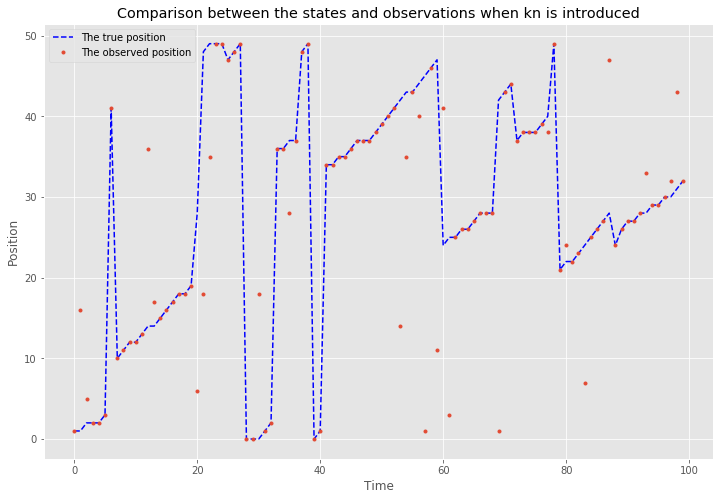

In [52]:
plt.figure(figsize=(12,8))
plt.plot(state , 'b--' , label='The true position')
plt.plot(obs , '.' , label='The observed position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Comparison between the states and observations when kn is introduced')
plt.legend()
plt.show()

Once $\kappa$ is introduced, we notice that there some "jumps" appearing in the graph proving that sometimes the robot is kidnapped from its position to go to another totally independent.

In [54]:
c = 0
for i in range(len(state)):
    if state[i] == obs[i]:
        c+=1
print("The % of the sensor being right is : " + str(c)+"%")

The % of the sensor being right is : 76%
